# Cuaderno Didáctico: Optimización de Portafolios con Python (Versión Mercado Mexicano)

***Autor: José Luis Cruz Balderas, CFA***

### Nota Importante y Descargo de Responsabilidad

 El contenido de este cuaderno se presenta con **fines puramente educativos** y de **demostración técnica**. La información y el código aquí expuestos **no constituyen de ninguna manera asesoramiento financiero, una recomendación de inversión, ni una oferta para comprar o vender ningún activo financiero.**

- Este material se proporciona "tal cual", sin ninguna garantía de precisión, integridad o actualidad. El código fue desarrollado utilizando versiones específicas de las librerías de Python en el momento de su creación; su correcto funcionamiento en el futuro podría requerir adaptaciones debido a actualizaciones de dichas librerías. El autor se reserva el derecho de **realizar modificaciones** a este cuaderno a su entera discrecionalidad.

- Al ser un documento de carácter público, el autor no se hace responsable del **uso, interpretación o consecuencias derivadas de la aplicación que terceros puedan darle a la información o al código aquí presentados.** Para la elaboración de este material se utilizaron herramientas de **Inteligencia Artificial** como apoyo en la redacción y estructuración; todo el contenido ha sido **cuidadosamente supervisado, validado y corregido por el autor** para asegurar su fiabilidad y coherencia con la teoría y la práctica financiera.

- Los análisis se basan en **datos históricos**, y es fundamental recordar que el **rendimiento pasado no es un indicador fiable de resultados futuros.** Los mercados financieros son **inherentemente volátiles e impredecibles**. Se recomienda que consulte a un **asesor financiero profesional** antes de tomar cualquier decisión de inversión.

## Introducción: El Dilema del Inversionista

Todo inversionista, desde el más novato hasta el más experimentado, se enfrenta al mismo dilema fundamental: **¿Cómo puedo obtener el mayor rendimiento posible para un nivel de riesgo que estoy dispuesto a aceptar?**

Durante décadas, la respuesta fue un arte más que una ciencia. Se basaba en la intuición, en la selección de acciones "ganadoras" y en la vaga idea de que "no hay que poner todos los huevos en la misma canasta".

Todo cambió en 1952. Un joven economista llamado **Harry Markowitz** publicó un paper que transformó la inversión en una ciencia. Demostró matemáticamente que el riesgo de un portafolio no depende de los activos individuales, sino de cómo se relacionan entre sí. Nos dio las herramientas para medir y gestionar el riesgo de forma precisa. Por este trabajo, ganaría el Premio Nobel.

**¿Qué harás en este cuaderno?**

En este tutorial interactivo, seguirás los pasos de Markowitz. Aprenderás a usar Python y sus poderosas librerías para:

1. Construir un portafolio de activos.

2. Calcular su riesgo y su retorno esperado.

3. Encontrar la **Frontera Eficiente**: el conjunto de todos los portafolios que ofrecen la mejor relación riesgo-retorno.

4. Identificar el **Portafolio Óptimo**: la cartera que, según la teoría, ofrece el mejor balance posible entre riesgo y retorno.

Al final, no solo habrás creado un modelo de optimización sofisticado, sino que entenderás profundamente los principios que rigen la inversión moderna.

**¡Empecemos!**

## Fase 0: Configuración del Entorno

Antes de sumergirnos en el análisis, debemos asegurarnos de que nuestro entorno de Python tenga todas las herramientas necesarias. La siguiente celda de código utiliza `pip` , el gestor de paquetes de Python, para instalar todas las librerías que usaremos en este proyecto.

- *Si es la primera vez que ejecutas este cuaderno, simplemente ejecuta la celda de abajo.*
 
- *Si ya tienes las librerías instaladas, puedes omitir este paso.*

In [1]:
# El símbolo '!' le dice a Jupyter que ejecute el comando en la terminal del sistema.
# El parámetro '-q' (quiet) es para que la instalación sea menos ruidosa y muestre menos texto.
!pip install yfinance pandas numpy matplotlib seaborn scipy -q

print("Entorno configurado. Todas las librerías necesarias están instaladas.")

Entorno configurado. Todas las librerías necesarias están instaladas.


## Fase 1: Preparación y Análisis de Datos

¡Bienvenido! En esta primera fase de nuestro análisis, sentaremos las bases de nuestro proyecto. El objetivo es simple pero crucial: obtener los datos históricos de nuestros activos seleccionados y procesarlos para obtener los dos ingredientes fundamentales que Harry Markowitz nos enseñó a usar:

El **Retorno Esperado** de cada activo.

La **Covarianza** entre ellos, que mide cómo se mueven juntos.

Comencemos.

### Paso 1.1: Importación de Librerías

Una vez configurado el entorno, procedemos a importar las librerías que utilizaremos. Agrupar todas las importaciones al inicio del script es una buena práctica. Cada una es como un especialista en nuestro equipo:

- `yfinance`: Nuestro corredor de bolsa personal. Irá a Yahoo! Finance y nos traerá los datos de precios que le pidamos.

- `pandas`: El maestro de las hojas de cálculo en Python. Lo usaremos para organizar nuestros datos en tablas (DataFrames).

- `numpy`: El genio de las matemáticas. Se encargará de los cálculos numéricos complejos de manera eficiente.

- `datetime`: Para manejar las fechas de nuestro análisis.

- `matplotlib` / `seaborn`: Nuestros artistas gráficos. Se encargarán de crear las visualizaciones de la Frontera Eficiente.

- `scipy`: Nuestro optimizador matemático. Lo usaremos para encontrar los portafolios óptimos de forma precisa.

In [2]:
# --- Librerías para análisis de datos ---
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.optimize import minimize 

# --- Librerías para visualización ---
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


### Paso 1.2: Selección de Activos y Periodo de Análisis

Para nuestro análisis, es crucial seleccionar un conjunto de activos que nos permita observar el poder de la diversificación. Por ello, hemos elegido un portafolio que combina:

- **Empresas líderes de México en diferentes sectores:** Para representar la economía local (consumo, finanzas, industrial, telecomunicaciones).

- **Un ETF del mercado estadounidense:** Para añadir diversificación geográfica y reducir el riesgo país.

Este enfoque nos permitirá construir un portafolio realista y robusto. Para el análisis, hemos definido una ventana de tiempo de **5 años**. El código está diseñado para ser dinámico: al ejecutarse, automáticamente tomará los datos de los últimos cinco años a partir de la fecha actual. Esto asegura que nuestra muestra siempre sea reciente e incluya diferentes condiciones de mercado. Si se desea analizar un periodo histórico específico, las variables `fecha_inicio` y `fecha_fin` en el siguiente bloque de código se pueden modificar fácilmente.

In [3]:
# Universo de activos: 4 de México y 1 de EE.UU. para diversificación
tickers = ['WALMEX.MX', 'AMXB.MX', 'GFNORTEO.MX', 'CEMEXCPO.MX', 'SPY']

# Definimos el periodo de 5 años
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - pd.DateOffset(years=5)

print(f"Activos a analizar: {tickers}")
print(f"Periodo de análisis: Desde {fecha_inicio.strftime('%Y-%m-%d')} hasta {fecha_fin.strftime('%Y-%m-%d')}")

Activos a analizar: ['WALMEX.MX', 'AMXB.MX', 'GFNORTEO.MX', 'CEMEXCPO.MX', 'SPY']
Periodo de análisis: Desde 2020-08-31 hasta 2025-08-31


### Paso 1.3: Descarga y Limpieza de Datos

Ahora le pedimos a `yfinance` que nos traiga los precios de cierre ajustados (`Adj Close`). Usamos el precio ajustado porque ya tiene en cuenta eventos como el pago de dividendos, lo que nos da una medida más precisa del rendimiento real para el inversionista.

>**Nota técnica:** Incluimos el parámetro `auto_adjust=False`. Por defecto, la librería `yfinance` ahora ajusta todos los precios y elimina la columna `Adj Close`. Al especificar `auto_adjust=False`, le pedimos que mantenga el comportamiento anterior y nos entregue la columna `Adj Close` por separado, que es la que usaremos para nuestros cálculos.

Una vez descargados, es una buena práctica verificar si existen datos faltantes. Los datos de mercado se registran solo en **días hábiles**, por lo que no tendremos información de **fines de semana** o **días festivos**. Adicionalmente, un dato faltante (`NaN`) puede ocurrir si un mercado estuvo cerrado en un día festivo que otro no. Mostraremos la suma de `NaNs` antes y después de la limpieza para confirmar que nuestro proceso fue exitoso.

In [4]:
# Descargamos los precios de cierre ajustados, especificando auto_adjust=False
precios = yf.download(tickers, start=fecha_inicio, end=fecha_fin, auto_adjust=False)['Adj Close']

# Verificamos cuántos datos faltantes hay por cada activo ANTES de la limpieza
print("Verificando datos faltantes ANTES de la limpieza:")
print(precios.isna().sum())

# Eliminamos cualquier fila con datos faltantes para mantener la integridad del análisis
precios_limpios = precios.dropna()

# Verificamos que ya no haya datos faltantes DESPUÉS de la limpieza
print("\nVerificando datos faltantes DESPUÉS de la limpieza:")
print(precios_limpios.isna().sum())

# Mostramos los primeros 5 registros para verificar la estructura de los datos
print("\nVista previa de los precios descargados y limpios:")
precios_limpios.head()

[*********************100%***********************]  5 of 5 completed


Verificando datos faltantes ANTES de la limpieza:
Ticker
AMXB.MX        35
CEMEXCPO.MX    35
GFNORTEO.MX    35
SPY            38
WALMEX.MX      35
dtype: int64

Verificando datos faltantes DESPUÉS de la limpieza:
Ticker
AMXB.MX        0
CEMEXCPO.MX    0
GFNORTEO.MX    0
SPY            0
WALMEX.MX      0
dtype: int64

Vista previa de los precios descargados y limpios:


Ticker,AMXB.MX,CEMEXCPO.MX,GFNORTEO.MX,SPY,WALMEX.MX
Date,,,,,
2020-08-31,11.220980,6.991443,52.115894,325.248810,47.361977
2020-09-01,11.204293,7.170711,53.031906,328.312347,47.866886
2020-09-02,11.204293,7.061159,51.502926,333.061005,47.470173
2020-09-03,11.220980,6.832094,50.903736,321.598877,47.217724
2020-09-04,11.220980,6.842053,51.461605,318.973114,46.748875


### Paso 1.4: Cálculo de Retornos

Los precios por sí solos no nos dicen mucho sobre el rendimiento. Necesitamos calcular los **retornos diarios**. Usaremos los **retornos logarítmicos**, una práctica estándar en finanzas cuantitativas porque tienen propiedades estadísticas muy convenientes (como la aditividad a lo largo del tiempo).

La fórmula es: `ln(Precio de Hoy / Precio de Ayer)`

In [5]:
# Calculamos los retornos logarítmicos diarios
retornos = np.log(precios_limpios / precios_limpios.shift(1))

# El primer día no tendrá retorno, así que eliminamos esa fila
retornos = retornos.dropna()

# Mostramos los primeros 5 registros de los retornos
print("Vista previa de los retornos logarítmicos diarios:")
retornos.head()

Vista previa de los retornos logarítmicos diarios:


Ticker,AMXB.MX,CEMEXCPO.MX,GFNORTEO.MX,SPY,WALMEX.MX
Date,,,,,
2020-09-01,-0.001488,0.025318,0.017424,0.009375,0.010604
2020-09-02,0.000000,-0.015396,-0.029255,0.014360,-0.008322
2020-09-03,0.001488,-0.032978,-0.011702,-0.035021,-0.005332
2020-09-04,0.000000,0.001457,0.010900,-0.008198,-0.009979
2020-09-08,0.000000,-0.008772,-0.008872,-0.027703,-0.015158


### Paso 1.5: Cálculo de Métricas Anualizadas

Finalmente, tomamos nuestros datos diarios y los proyectamos a un horizonte anual, que es más útil para la toma de decisiones de inversión.

- **Retornos Medios Anualizados:** El retorno promedio que podríamos esperar en un año. Lo calculamos multiplicando el retorno diario promedio por 252 (el número aproximado de días de trading en un año).

- **Matriz de Covarianza Anualizada:** Esta es la pieza central. Nos dice no solo el riesgo de cada activo (en la diagonal), sino también cómo se mueve cada activo en relación con los demás.

In [6]:
# Calculamos el vector de retornos medios anualizados
retornos_medios_anual = retornos.mean() * 252

# Calculamos la matriz de covarianza anualizada
matriz_covarianza_anual = retornos.cov() * 252

print("\n--- ¡Análisis Completado! ---")
print("\nRetornos Medios Anualizados (Nuestro 'Retorno Esperado'):")
print(retornos_medios_anual)

print("\nMatriz de Covarianza Anualizada (Nuestro 'Riesgo y Correlación'):")
matriz_covarianza_anual


--- ¡Análisis Completado! ---

Retornos Medios Anualizados (Nuestro 'Retorno Esperado'):
Ticker
AMXB.MX        0.104833
CEMEXCPO.MX    0.182557
GFNORTEO.MX    0.244231
SPY            0.141438
WALMEX.MX      0.033718
dtype: float64

Matriz de Covarianza Anualizada (Nuestro 'Riesgo y Correlación'):


Ticker,AMXB.MX,CEMEXCPO.MX,GFNORTEO.MX,SPY,WALMEX.MX
Ticker,,,,,
AMXB.MX,0.059179,0.006526,0.008772,0.002820,0.008851
CEMEXCPO.MX,0.006526,0.141841,0.036625,0.029060,0.020177
GFNORTEO.MX,0.008772,0.036625,0.112852,0.015973,0.024350
SPY,0.002820,0.029060,0.015973,0.031934,0.007780
WALMEX.MX,0.008851,0.020177,0.024350,0.007780,0.071510


¡Y listo! Hemos completado la primera fase. Ya tenemos en nuestras manos los dos ingredientes esenciales para aplicar la teoría de Markowitz. En la siguiente fase, usaremos estos resultados para simular miles de portafolios y empezar a buscar nuestra Frontera Eficiente.

## Fase 2: Simulación de Monte Carlo y Optimización

Con nuestros datos listos, ahora podemos empezar a construir portafolios. Pero, ¿qué combinación de nuestros 5 activos es la mejor? ¿Invertimos 20% en cada uno? ¿O 50% en uno y 12.5% en los otros? Las combinaciones son infinitas.

Para explorar este universo de posibilidades, usaremos una técnica llamada **Simulación de Monte Carlo**. La idea es simple: vamos a generar miles de portafolios con ponderaciones aleatorias, calcularemos el riesgo y el retorno de cada uno, y los grafiremos. El resultado será una "nube" de puntos que nos mostrará visualmente la relación entre riesgo y retorno.

### Paso 2.1: Definición de la Tasa Libre de Riesgo

Para calcular el **Sharpe Ratio**, una métrica clave que nos dice qué tan bueno es el retorno de un portafolio en comparación con su riesgo, necesitamos un punto de referencia: la **tasa libre de riesgo**. Para un análisis en México, la mejor aproximación es la tasa de los **CETES a 28 días**.

Obtener este valor de forma 100% automática requeriría conectarse a la API de Banxico, lo cual está fuera del alcance de este tutorial. Por ello, definiremos la tasa manualmente.

> **Acción recomendada**: Antes de ejecutar, busca en Google "tasa CETES 28 días" y actualiza la variable `tasa_libre_riesgo` con el valor más reciente (expresado como decimal).

In [7]:
# Tasa de CETES a 28 días
# Es importante actualizar este valor para un análisis preciso.
tasa_libre_riesgo = 0.075

print(f"Tasa libre de riesgo definida en: {tasa_libre_riesgo:.2%}")

Tasa libre de riesgo definida en: 7.50%


### Paso 2.2: Simulación de Portafolios

Ahora sí, vamos a generar 20,000 portafolios diferentes. Para cada uno, haremos lo siguiente:

- Asignaremos ponderaciones aleatorias a cada activo.

- Nos aseguraremos de que la suma de las ponderaciones sea 1 (es decir, el 100% de nuestro capital).

- Calcularemos el retorno, la volatilidad y el Sharpe Ratio del portafolio.

**Fórmula del Sharpe Ratio:**
(Retorno del Portafolio - Tasa Libre de Riesgo) / Volatilidad del Portafolio

In [8]:
# --- Configuración de la Simulación ---
# Define el número total de portafolios aleatorios que vamos a generar.
# Un número mayor nos dará una "nube" de puntos más densa y una mejor aproximación visual.
num_portafolios = 20000

# --- Preparación para almacenar resultados ---
# Creamos un "lienzo" vacío usando NumPy para guardar los resultados de forma eficiente.
# Tendrá 3 filas (para Retorno, Volatilidad, Sharpe Ratio) y una columna por cada portafolio.
resultados = np.zeros((3, num_portafolios))

# Creamos una lista vacía donde guardaremos las combinaciones de ponderaciones de cada portafolio.
lista_ponderaciones = []

# --- Bucle de la Simulación de Monte Carlo ---
# Este bucle se repetirá 'num_portafolios' veces. En cada repetición, creará un portafolio único.
for i in range(num_portafolios):
    # Genera un conjunto de números aleatorios, uno por cada activo en nuestro portafolio.
    # Por ejemplo, para 5 tickers, podría generar algo como [0.12, 0.84, 0.33, 0.91, 0.55].
    ponderaciones = np.random.random(len(tickers))
    
    # Normaliza los números aleatorios para que su suma sea exactamente 1 (el 100% de la inversión).
    # Esto se hace dividiendo cada número entre la suma total de ellos.
    ponderaciones /= np.sum(ponderaciones)
    
    # Guarda la combinación de ponderaciones válidas en nuestra lista.
    lista_ponderaciones.append(ponderaciones)
    
    # --- Cálculo de las métricas del portafolio actual ---
    # Calcula el retorno esperado del portafolio como la suma ponderada de los retornos individuales.
    retorno_portafolio = np.sum(retornos_medios_anual * ponderaciones)
    
    # Calcula la volatilidad del portafolio usando la fórmula matricial (wT * Σ * w).
    # Esta es la parte clave que considera cómo los activos se mueven juntos (covarianza).
    volatilidad_portafolio = np.sqrt(np.dot(ponderaciones.T, np.dot(matriz_covarianza_anual, ponderaciones)))
    
    # Calcula el Sharpe Ratio, que mide el retorno obtenido por cada unidad de riesgo asumido.
    sharpe_ratio = (retorno_portafolio - tasa_libre_riesgo) / volatilidad_portafolio
    
    # --- Almacenamiento de los resultados del portafolio actual ---
    # Guarda el retorno calculado en la primera fila, en la columna correspondiente al portafolio 'i'.
    resultados[0,i] = retorno_portafolio
    
    # Guarda la volatilidad en la segunda fila.
    resultados[1,i] = volatilidad_portafolio
    
    # Guarda el Sharpe Ratio en la tercera fila.
    resultados[2,i] = sharpe_ratio

# --- Convertir resultados a un DataFrame de Pandas para fácil manejo ---
# Creamos un diccionario para organizar nuestros datos antes de convertirlos en una tabla.
# Las primeras tres entradas usan los datos de nuestra matriz de resultados.
dict_resultados = {
    'Retorno': resultados[0],
    'Volatilidad': resultados[1],
    'SharpeRatio': resultados[2]
}

# Este bucle recorre la lista de ponderaciones y crea una nueva columna en el diccionario para cada activo.
# Por ejemplo, creará 'Peso_WALMEX.MX' y le asignará una lista con las 20,000 ponderaciones de WALMEX.
for i, ticker in enumerate(tickers):
    dict_resultados[f'Peso_{ticker}'] = [p[i] for p in lista_ponderaciones]

# Convierte el diccionario, que ahora está perfectamente estructurado, en una tabla de pandas.
portafolios_simulados = pd.DataFrame(dict_resultados)

# Imprime un mensaje de confirmación y muestra las primeras 5 filas de nuestra tabla final.
print("Simulación completada. Vista previa de los resultados:")
portafolios_simulados.head()

Simulación completada. Vista previa de los resultados:


,Retorno,Volatilidad,SharpeRatio,Peso_WALMEX.MX,Peso_AMXB.MX,Peso_GFNORTEO.MX,Peso_CEMEXCPO.MX,Peso_SPY
0,0.145657,0.173425,0.407419,0.124468,0.062242,0.307622,0.269819,0.235849
1,0.152230,0.176500,0.437566,0.006042,0.116963,0.257205,0.431945,0.187844
2,0.149840,0.207419,0.360815,0.356101,0.422637,0.078736,0.105066,0.037460
3,0.151050,0.181051,0.420046,0.250171,0.269089,0.193651,0.173818,0.113271
4,0.140663,0.193855,0.338720,0.313641,0.335542,0.147685,0.033502,0.169630


### Paso 2.3: Visualización de la Frontera Eficiente

Ahora, grafiquemos los resultados. Cada punto en el gráfico representará uno de los 20,000 portafolios que simulamos.

- **Eje X:** Volatilidad (Riesgo)

- **Eje Y:** Retorno

- **Color:** Sharpe Ratio (los colores más cálidos indicarán un mejor retorno ajustado por riesgo)

La forma de "paraguas" o hipérbola que forman los puntos es la famosa **Frontera Eficiente**. Los portafolios en el borde superior izquierdo de la nube son los "eficientes": ofrecen el mayor retorno para un nivel de riesgo dado.

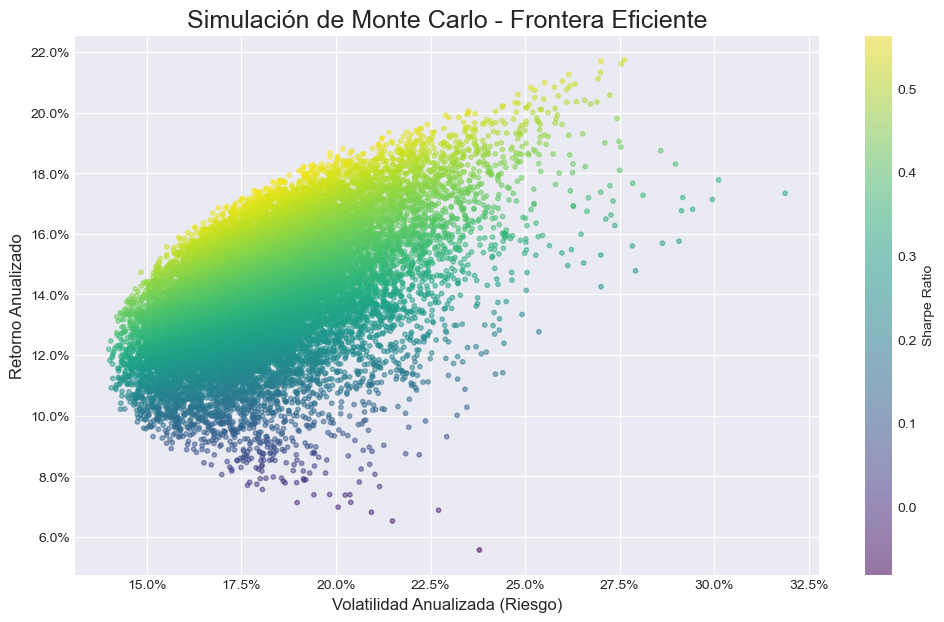

In [9]:
# --- Gráfico de la Simulación ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 7))

plt.scatter(portafolios_simulados['Volatilidad'], 
            portafolios_simulados['Retorno'], 
            c=portafolios_simulados['SharpeRatio'], 
            cmap='viridis', 
            marker='o',
            s=10, 
            alpha=0.5)

# --- Formato de Ejes a Porcentaje ---
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.colorbar(label='Sharpe Ratio')
plt.title('Simulación de Monte Carlo - Frontera Eficiente', fontsize=18)
plt.xlabel('Volatilidad Anualizada (Riesgo)', fontsize=12)
plt.ylabel('Retorno Anualizado', fontsize=12)
plt.grid(True)
plt.show()


### Paso 2.4: Identificando los Portafolios Clave de la Simulación

La simulación nos da una excelente idea visual, pero es una aproximación basada en la aleatoriedad. Antes de pasar a la optimización matemática precisa, podemos identificar los mejores portafolios que nuestra simulación logró encontrar.

Buscaremos dos portafolios específicos en nuestros resultados:

1. **Portafolio de Máximo Sharpe Ratio:** El que ofreció el mejor retorno por cada unidad de riesgo.

2. **Portafolio de Mínima Varianza (o Volatilidad):** El portafolio más seguro posible que se generó.

In [10]:
# --- Localizar los portafolios óptimos de la SIMULACIÓN ---
max_sharpe_portafolio = portafolios_simulados.loc[portafolios_simulados['SharpeRatio'].idxmax()]
min_vol_portafolio = portafolios_simulados.loc[portafolios_simulados['Volatilidad'].idxmin()]

print("--- Portafolios Óptimos (según la simulación) ---")
print("\nPortafolio de Máximo Sharpe Ratio:")
print(max_sharpe_portafolio)
print("\nPortafolio de Mínima Volatilidad:")
print(min_vol_portafolio)

--- Portafolios Óptimos (según la simulación) ---

Portafolio de Máximo Sharpe Ratio:
Retorno             0.186808
Volatilidad         0.198450
SharpeRatio         0.563409
Peso_WALMEX.MX      0.061207
Peso_AMXB.MX        0.053493
Peso_GFNORTEO.MX    0.448461
Peso_CEMEXCPO.MX    0.430459
Peso_SPY            0.006380
Name: 19207, dtype: float64

Portafolio de Mínima Volatilidad:
Retorno             0.121945
Volatilidad         0.139960
SharpeRatio         0.335416
Peso_WALMEX.MX      0.234716
Peso_AMXB.MX        0.015226
Peso_GFNORTEO.MX    0.055058
Peso_CEMEXCPO.MX    0.535448
Peso_SPY            0.159552
Name: 17872, dtype: float64


### Paso 2.5: Visualización Intermedia con Portafolios Simulados

Ahora, vamos a repetir nuestro gráfico, pero esta vez destacaremos los dos portafolios que acabamos de encontrar. Usaremos estrellas grandes y de colores llamativos para que sean fáciles de identificar.

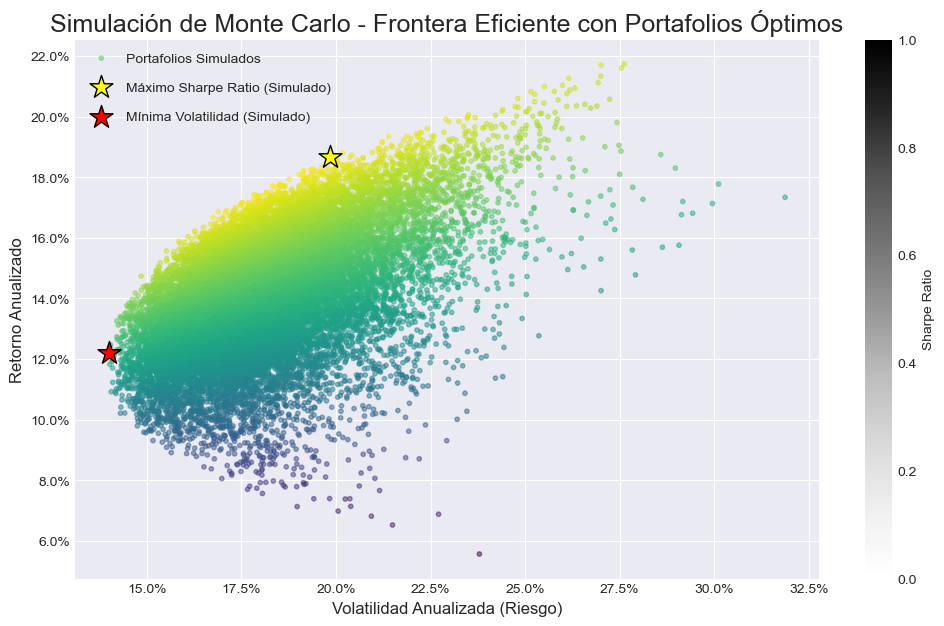

In [11]:
# --- Gráfico Final con Portafolios Óptimos ---
plt.figure(figsize=(12, 7))

plt.scatter(portafolios_simulados['Volatilidad'], 
            portafolios_simulados['Retorno'], 
            c=portafolios_simulados['SharpeRatio'], 
            cmap='viridis', 
            marker='o',
            s=10, 
            alpha=0.5,
            label='Portafolios Simulados')

plt.scatter(max_sharpe_portafolio['Volatilidad'], 
            max_sharpe_portafolio['Retorno'], 
            marker='*', 
            color='yellow', 
            s=300, 
            edgecolors='black',
            label='Máximo Sharpe Ratio (Simulado)')

plt.scatter(min_vol_portafolio['Volatilidad'], 
            min_vol_portafolio['Retorno'], 
            marker='*', 
            color='red', 
            s=300,
            edgecolors='black',
            label='Mínima Volatilidad (Simulado)')

# --- Formato de Ejes a Porcentaje ---
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.colorbar(label='Sharpe Ratio')
plt.title('Simulación de Monte Carlo - Frontera Eficiente con Portafolios Óptimos', fontsize=18)
plt.xlabel('Volatilidad Anualizada (Riesgo)', fontsize=12)
plt.ylabel('Retorno Anualizado', fontsize=12)
plt.legend(labelspacing=1.2)
plt.grid(True)



plt.show()


¡Felicidades! Has completado la primera parte de la Fase 2. No solo has visualizado el universo de posibilidades de inversión con tus activos, sino que también has identificado las dos carteras más importantes que encontró nuestra simulación.

En el siguiente paso, usaremos un optimizador matemático para encontrar los valores exactos de estos portafolios, en lugar de depender de la suerte de nuestra simulación.

## Fase 3: Optimización Matemática y la Frontera Eficiente

La simulación es potente, pero es como buscar una aguja en un pajar lanzando imanes al azar. Para encontrar la aguja exacta, necesitamos un detector de metales. Nuestro detector es el optimizador de `scipy.optimize`.

En esta fase, haremos tres cosas:

- Encontraremos los **dos portafolios "ancla"** de la frontera: el de Mínima Volatilidad y el de Máximo Sharpe Ratio.

- Trazaremos la **curva completa de la Frontera Eficiente** para visualizar todas las opciones óptimas.

- Calcularemos un **portafolio personalizado** basado en un nivel de riesgo objetivo.

### Paso 3.1: Definición de Funciones para el Optimizador

Primero, creamos funciones que, dadas unas ponderaciones, nos devuelvan las métricas del portafolio. Esto hace nuestro código más limpio y reutilizable. Le daremos al optimizador un objetivo (maximizar Sharpe o minimizar volatilidad) y unas reglas (las ponderaciones deben sumar 100%).

In [12]:
def obtener_metricas_portafolio(ponderaciones):
    """
    Calcula el retorno, la volatilidad y el sharpe ratio de un portafolio.
    """
    retorno = np.sum(retornos_medios_anual * ponderaciones)
    volatilidad = np.sqrt(np.dot(ponderaciones.T, np.dot(matriz_covarianza_anual, ponderaciones)))
    sharpe = (retorno - tasa_libre_riesgo) / volatilidad
    return np.array([retorno, volatilidad, sharpe])

# Funciones objetivo para el optimizador
# Nota: Para maximizar el Sharpe Ratio, minimizamos su negativo.
def neg_sharpe_ratio(ponderaciones):
    return -obtener_metricas_portafolio(ponderaciones)[2]

def volatilidad_portafolio(ponderaciones):
    return obtener_metricas_portafolio(ponderaciones)[1]

### Paso 3.2: Cálculo de los Portafolios Ancla

Ahora configuramos las reglas (restricciones) y le pedimos a `scipy` que encuentre las ponderaciones exactas para nuestros dos portafolios clave.

In [13]:
# Restricciones y límites para el optimizador
restricciones = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
limites = tuple((0, 1) for asset in range(len(tickers)))
ponderaciones_iniciales = len(tickers) * [1. / len(tickers),]

# --- Optimización para Máximo Sharpe Ratio ---
solucion_sharpe = minimize(neg_sharpe_ratio, ponderaciones_iniciales, method='SLSQP', bounds=limites, constraints=restricciones)

# --- Optimización para Mínima Volatilidad ---
solucion_volatilidad = minimize(volatilidad_portafolio, ponderaciones_iniciales, method='SLSQP', bounds=limites, constraints=restricciones)

# --- Extracción de Resultados ---
ponderaciones_sharpe = solucion_sharpe.x
metricas_sharpe = obtener_metricas_portafolio(ponderaciones_sharpe)

ponderaciones_vol = solucion_volatilidad.x
metricas_vol = obtener_metricas_portafolio(ponderaciones_vol)

# --- Retroalimentación para el usuario ---
print("--- Portafolios Ancla Calculados ---")
print("\n Portafolio de Máximo Sharpe Ratio (Optimizado):")
for i, ticker in enumerate(tickers):
    print(f"  Peso {ticker}: {ponderaciones_sharpe[i]:.2%}")

print("\n Portafolio de Mínima Volatilidad (Optimizado):")
for i, ticker in enumerate(tickers):
    print(f"  Peso {ticker}: {ponderaciones_vol[i]:.2%}")


--- Portafolios Ancla Calculados ---

 Portafolio de Máximo Sharpe Ratio (Optimizado):
  Peso WALMEX.MX: 8.27%
  Peso AMXB.MX: 5.52%
  Peso GFNORTEO.MX: 42.40%
  Peso CEMEXCPO.MX: 43.81%
  Peso SPY: 0.00%

 Portafolio de Mínima Volatilidad (Optimizado):
  Peso WALMEX.MX: 27.20%
  Peso AMXB.MX: 0.00%
  Peso GFNORTEO.MX: 4.14%
  Peso CEMEXCPO.MX: 52.09%
  Peso SPY: 16.57%


### Paso 3.3: Trazado de la Frontera Eficiente

Ahora viene la parte más elegante. Para trazar la curva de la frontera, le pediremos al optimizador que encuentre el portafolio que **minimiza el riesgo para un rango de retornos posibles.**

In [14]:
# --- Trazado de la Curva de la Frontera Eficiente ---
frontera_y = np.linspace(metricas_vol[0], metricas_sharpe[0]*1.1, 50) # Rango de retornos
frontera_x = []

def minimizar_volatilidad_para_retorno(ponderaciones):
    return obtener_metricas_portafolio(ponderaciones)[1]

for retorno_posible in frontera_y:
    # Restricciones: la suma de pesos es 1 y el retorno es el que estamos evaluando
    restricciones_frontera = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: obtener_metricas_portafolio(x)[0] - retorno_posible}
    )
    
    solucion = minimize(minimizar_volatilidad_para_retorno, ponderaciones_iniciales, method='SLSQP', bounds=limites, constraints=restricciones_frontera)
    frontera_x.append(solucion.fun)

# --- Retroalimentación para el usuario ---
print("\nCálculo de la curva de la Frontera Eficiente completado.")


Cálculo de la curva de la Frontera Eficiente completado.


### Paso 3.4: Portafolio Personalizado por Nivel de Riesgo

Esta sección demuestra el poder práctico de la Frontera Eficiente. Un inversionista puede definir su máxima tolerancia al riesgo (volatilidad), y podemos encontrar el portafolio que le ofrece el **máximo retorno posible sin superar ese riesgo.**

> **Acción recomendada:** Modifica la variable `riesgo_objetivo` al nivel de volatilidad que desees analizar.

In [15]:
# --- Cálculo de Portafolio para un Riesgo Objetivo ---
riesgo_objetivo = 0.15 # Por ejemplo, 15% de volatilidad máxima

def maximizar_retorno_para_riesgo(ponderaciones):
    return -obtener_metricas_portafolio(ponderaciones)[0]

restricciones_riesgo = (
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
    {'type': 'ineq', 'fun': lambda x: riesgo_objetivo - obtener_metricas_portafolio(x)[1]}
)

solucion_riesgo = minimize(maximizar_retorno_para_riesgo, ponderaciones_iniciales, method='SLSQP', bounds=limites, constraints=restricciones_riesgo)

ponderaciones_riesgo = solucion_riesgo.x
metricas_riesgo = obtener_metricas_portafolio(ponderaciones_riesgo)

# --- Retroalimentación para el usuario ---
print(f"\n--- Portafolio Personalizado para un Riesgo Máximo de {riesgo_objetivo:.2%} ---")
for i, ticker in enumerate(tickers):
    print(f"  Peso {ticker}: {ponderaciones_riesgo[i]:.2%}")


--- Portafolio Personalizado para un Riesgo Máximo de 15.00% ---
  Peso WALMEX.MX: 25.23%
  Peso AMXB.MX: 0.82%
  Peso GFNORTEO.MX: 17.68%
  Peso CEMEXCPO.MX: 55.89%
  Peso SPY: 0.37%


### Paso 3.5: El Gráfico Maestro y la Tabla Final

Finalmente, creamos nuestro gráfico maestro que integra todo: la simulación, la curva de la frontera eficiente y los portafolios clave. Justo después, presentamos la tabla resumen.

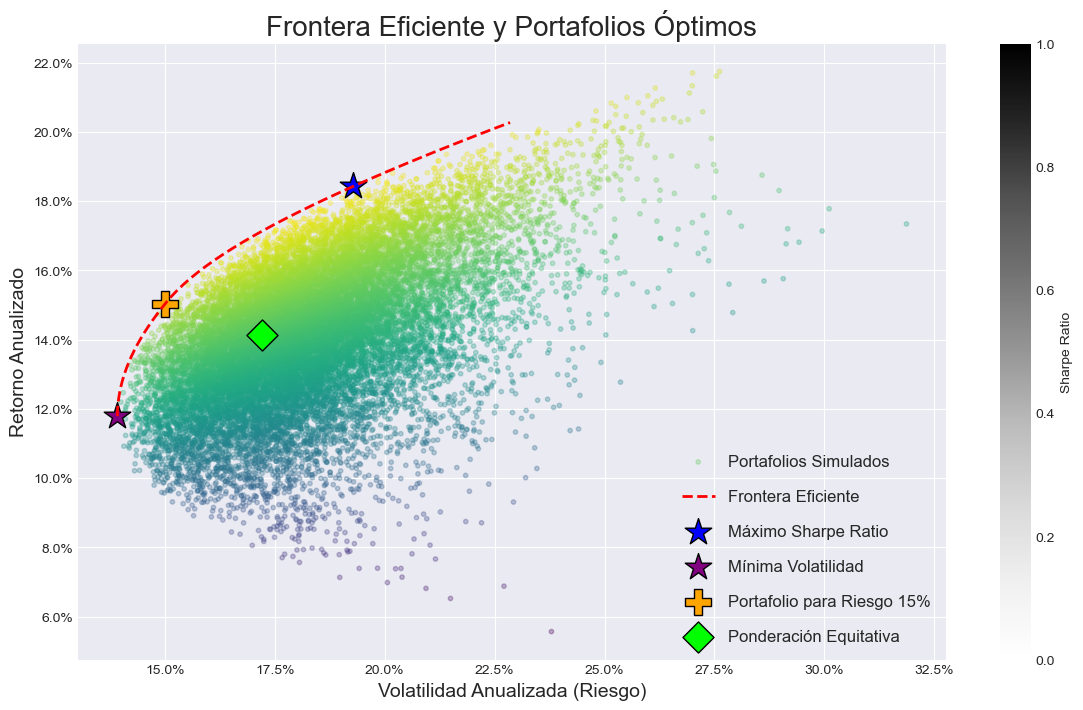

--- Tabla de Ponderaciones de Portafolios Clave ---
                         WALMEX.MX     AMXB.MX GFNORTEO.MX CEMEXCPO.MX         SPY
Máximo Sharpe            8.265088%   5.522552%  42.397389%  43.814972%   0.000000%
Mínima Volatilidad      27.195975%   0.000000%   4.143149%  52.086165%  16.574711%
Riesgo Objetivo (15%)   25.231209%   0.815602%  17.684609%  55.894287%   0.374294%
Ponderación Equitativa  20.000000%  20.000000%  20.000000%  20.000000%  20.000000%

--- Tabla de Métricas de Portafolios Clave ---
                       Retorno Volatilidad Sharpe Ratio
Máximo Sharpe           18.43%      19.28%         0.57
Mínima Volatilidad      11.79%      13.91%         0.31
Riesgo Objetivo (15%)   15.03%      15.00%         0.50
Ponderación Equitativa  14.14%      17.20%         0.39


In [16]:
# --- Cálculo del Portafolio de Ponderación Equitativa (Benchmark) ---
ponderaciones_iguales = np.array(len(tickers) * [1./len(tickers)])
metricas_iguales = obtener_metricas_portafolio(ponderaciones_iguales)

# --- Gráfico Final Comparativo ---
plt.figure(figsize=(14, 8))

# 1. Scatter plot de la simulación
plt.scatter(portafolios_simulados['Volatilidad'], portafolios_simulados['Retorno'], c=portafolios_simulados['SharpeRatio'], cmap='viridis', marker='o', s=10, alpha=0.3, label='Portafolios Simulados')

# 2. Curva de la Frontera Eficiente
plt.plot(frontera_x, frontera_y, 'r--', linewidth=2, label='Frontera Eficiente')

# 3. Portafolios óptimos y de referencia
plt.scatter(metricas_sharpe[1], metricas_sharpe[0], marker='*', color='blue', s=400, edgecolors='black', label='Máximo Sharpe Ratio')
plt.scatter(metricas_vol[1], metricas_vol[0], marker='*', color='purple', s=400, edgecolors='black', label='Mínima Volatilidad')
plt.scatter(metricas_riesgo[1], metricas_riesgo[0], marker='P', color='orange', s=350, edgecolors='black', label=f'Portafolio para Riesgo {riesgo_objetivo:.0%}')
plt.scatter(metricas_iguales[1], metricas_iguales[0], marker='D', color='lime', s=250, edgecolors='black', label='Ponderación Equitativa')

# Configuraciones del gráfico
plt.colorbar(label='Sharpe Ratio')
plt.title('Frontera Eficiente y Portafolios Óptimos', fontsize=20)
plt.xlabel('Volatilidad Anualizada (Riesgo)', fontsize=14)
plt.ylabel('Retorno Anualizado', fontsize=14)
plt.legend(labelspacing=1.2, fontsize=12)
plt.grid(True)

# --- Formato de Ejes a Porcentaje ---
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

# --- Creación de la Tabla Resumen ---
data = {
    'Máximo Sharpe': ponderaciones_sharpe,
    'Mínima Volatilidad': ponderaciones_vol,
    f'Riesgo Objetivo ({riesgo_objetivo:.0%})': ponderaciones_riesgo,
    'Ponderación Equitativa': ponderaciones_iguales
}
tabla_portafolios = pd.DataFrame(data, index=tickers)

metricas = pd.DataFrame({
    'Máximo Sharpe': metricas_sharpe,
    'Mínima Volatilidad': metricas_vol,
    f'Riesgo Objetivo ({riesgo_objetivo:.0%})': metricas_riesgo,
    'Ponderación Equitativa': metricas_iguales
}, index=['Retorno', 'Volatilidad', 'Sharpe Ratio'])

print("--- Tabla de Ponderaciones de Portafolios Clave ---")
tabla_ponderaciones_formateada = tabla_portafolios.T.copy()
for col in tabla_ponderaciones_formateada.columns:
    tabla_ponderaciones_formateada[col] = tabla_ponderaciones_formateada[col].map('{:.6%}'.format)
print(tabla_ponderaciones_formateada.to_string())

print("\n--- Tabla de Métricas de Portafolios Clave ---")
print(metricas.T.to_string(formatters={'Retorno':'{:,.2%}'.format, 'Volatilidad':'{:,.2%}'.format, 'Sharpe Ratio':'{:,.2f}'.format}))



¡Excelente! Has completado la fase de optimización matemática. No solo hemos encontrado los portafolios ancla con precisión, sino que también hemos trazado la curva completa de la Frontera Eficiente y creado un portafolio a medida. En la fase final, daremos el último paso para introducir el activo libre de riesgo y descubrir la Línea de Mercado de Capitales, el concepto que unifica toda la teoría.

## Fase 4: La Línea de Mercado de Capitales y la Decisión Final del Inversionista

Hasta ahora, hemos operado en un universo de solo **activos riesgosos**. Pero en el mundo real, tenemos acceso a un **activo libre de riesgo** (como los CETES). La introducción de este activo cambia el juego por completo.

La **Línea de Mercado de Capitales (CML)** representa este nuevo y superior conjunto de oportunidades. Es una línea recta que parte de la tasa libre de riesgo y es tangente a nuestra Frontera Eficiente. El punto de tangencia es, precisamente, el portafolio de **Máximo Sharpe Ratio**

***¿Por qué es esto tan importante?***

- **Portafolios Superiores:** Cualquier portafolio que se encuentre sobre la CML es superior a cualquier portafolio en la Frontera Eficiente (excepto el de tangencia). Esto significa que portafolios que antes parecían "óptimos", como el de Mínima Volatilidad, ahora se vuelven ineficientes.

- **El Mejor Trato Riesgo-Retorno:** La pendiente de la CML es el **Sharpe Ratio** del portafolio de tangencia. Como la pendiente es constante, **todos los puntos en la CML tienen el mismo y máximo Sharpe Ratio posible**. Esto representa el mejor "trato" que un inversionista puede obtener en el mercado.

- **Nuevos Horizontes de Inversión:** La CML expande nuestras opciones. Para inversionistas conservadores, permite crear portafolios con un **riesgo menor al de Mínima Volatilidad** (combinando el activo libre de riesgo con el portafolio de tangencia) pero con un retorno superior al que ofrecía la Frontera Eficiente. Para inversionistas agresivos, la línea se extiende más allá del portafolio de tangencia, representando teóricamente **portafolios apalancados** donde se podría pedir prestado a la tasa libre de riesgo para invertir más del 100% del capital.


### Paso 4.1: El Portafolio Superior para Nuestro Riesgo Objetivo

Recordemos el portafolio que calculamos en la fase anterior para un nivel de riesgo específico. Dicho portafolio se encontraba sobre la Frontera Eficiente. Ahora, vamos a calcular un nuevo portafolio que tiene exactamente el **mismo nivel de riesgo**, pero que se encuentra sobre la CML. Veremos que, para un riesgo idéntico, podemos obtener un **retorno mayor**.


In [17]:
# --- Cálculo del Portafolio Superior en la CML ---
# Ecuación de la CML: Retorno = Tasa Libre de Riesgo + Volatilidad * Sharpe del Portafolio de Tangencia
retorno_cml_objetivo = tasa_libre_riesgo + riesgo_objetivo * metricas_sharpe[2]

# --- Retroalimentación para el usuario ---
print(f"--- Comparación para un Riesgo Objetivo del {riesgo_objetivo:.2%} ---")
print(f"Portafolio en la Frontera Eficiente:")
print(f"  - Retorno: {metricas_riesgo[0]:.2%}")
print(f"Portafolio en la Línea de Mercado de Capitales (CML):")
print(f"  - Retorno: {retorno_cml_objetivo:.2%}")
print(f"\nConclusión: Para el mismo nivel de riesgo, la CML ofrece un retorno superior.")

--- Comparación para un Riesgo Objetivo del 15.00% ---
Portafolio en la Frontera Eficiente:
  - Retorno: 15.03%
Portafolio en la Línea de Mercado de Capitales (CML):
  - Retorno: 16.00%

Conclusión: Para el mismo nivel de riesgo, la CML ofrece un retorno superior.


### Paso 4.2: La Receta Final del Inversionista

Entonces, ¿cómo se construye este portafolio superior en la CML? La respuesta es la conclusión más elegante de la teoría: es una simple combinación del **activo libre de riesgo** y el **portafolio de tangencia** (el de Máximo Sharpe).

Calcularemos exactamente qué porcentaje de nuestro capital debemos asignar a cada uno para alcanzar nuestro riesgo objetivo.

In [18]:
# --- Cálculo de Ponderaciones en la CML ---
# La ponderación en el portafolio riesgoso es el ratio del riesgo objetivo al riesgo del portafolio de tangencia
ponderacion_riesgosa = riesgo_objetivo / metricas_sharpe[1]
ponderacion_libre_riesgo = 1 - ponderacion_riesgosa

# --- Desglose de la Receta para el Inversionista ---
print(f"\n--- Receta para el Portafolio Superior con Riesgo del {riesgo_objetivo:.2%} ---")

# 1. La Decisión Estratégica
print("\n1. Decisión Estratégica (División del Capital):")
print(f"   - Invertir {ponderacion_libre_riesgo:.2%} del capital en el Activo Libre de Riesgo (CETES).")
print(f"   - Invertir {ponderacion_riesgosa:.2%} del capital en el Portafolio de Máximo Sharpe Ratio.")

# 2. Composición del Portafolio Riesgoso
print("\n2. Composición del Portafolio de Máximo Sharpe Ratio:")
for i, ticker in enumerate(tickers):
    print(f"   - {ticker}: {ponderaciones_sharpe[i]:.2%}")

# 3. Ponderación Final sobre el Capital Total
print("\n3. Ponderación Final sobre su Capital Total:")
print(f"   - Activo Libre de Riesgo: {ponderacion_libre_riesgo:.2%}")
for i, ticker in enumerate(tickers):
    ponderacion_efectiva = ponderaciones_sharpe[i] * ponderacion_riesgosa
    print(f"   - {ticker}: {ponderacion_efectiva:.2%}")



--- Receta para el Portafolio Superior con Riesgo del 15.00% ---

1. Decisión Estratégica (División del Capital):
   - Invertir 22.22% del capital en el Activo Libre de Riesgo (CETES).
   - Invertir 77.78% del capital en el Portafolio de Máximo Sharpe Ratio.

2. Composición del Portafolio de Máximo Sharpe Ratio:
   - WALMEX.MX: 8.27%
   - AMXB.MX: 5.52%
   - GFNORTEO.MX: 42.40%
   - CEMEXCPO.MX: 43.81%
   - SPY: 0.00%

3. Ponderación Final sobre su Capital Total:
   - Activo Libre de Riesgo: 22.22%
   - WALMEX.MX: 6.43%
   - AMXB.MX: 4.30%
   - GFNORTEO.MX: 32.98%
   - CEMEXCPO.MX: 34.08%
   - SPY: 0.00%


### Paso 4.3: El Gráfico y la Tabla Definitivos

Finalmente, creamos nuestro gráfico maestro y la tabla resumen, que ahora incluyen este nuevo "Portafolio Superior en la CML", permitiendo una comparación visual y numérica completa.

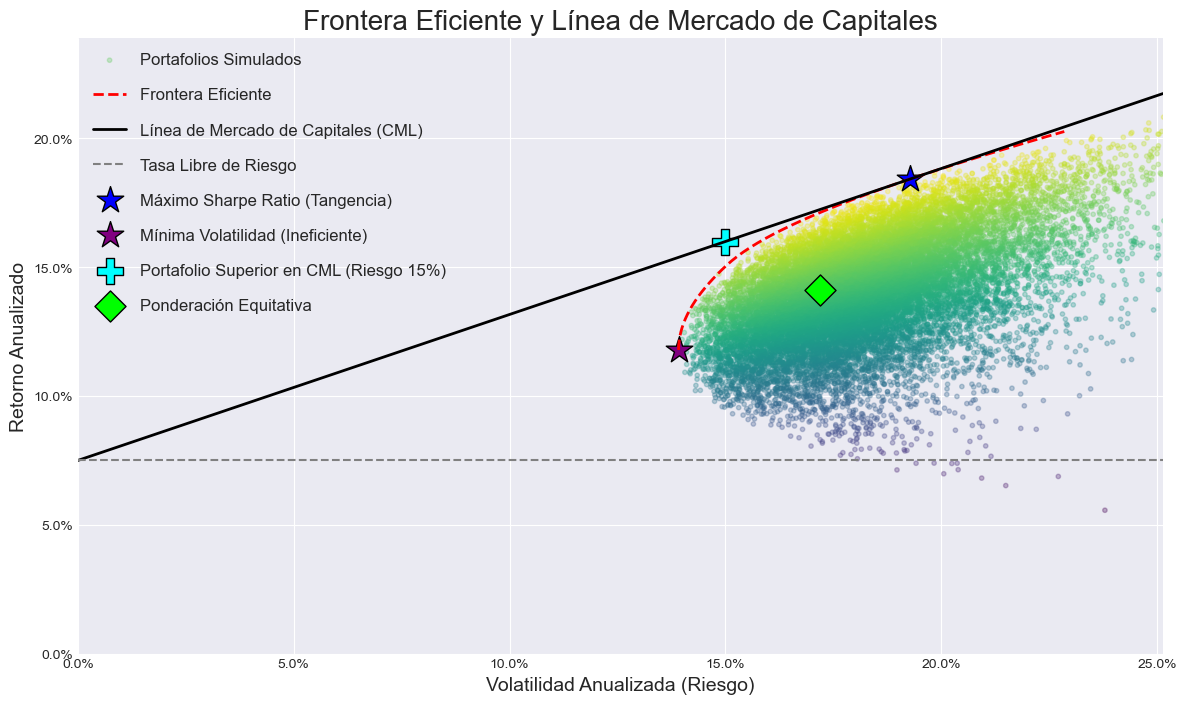

--- Tabla de Ponderaciones de Portafolios Clave ---
                         WALMEX.MX     AMXB.MX GFNORTEO.MX CEMEXCPO.MX         SPY
Máximo Sharpe            8.265088%   5.522552%  42.397389%  43.814972%   0.000000%
Mínima Volatilidad      27.195975%   0.000000%   4.143149%  52.086165%  16.574711%
Superior en CML          6.428969%   4.295697%  32.978656%  34.081319%   0.000000%
Ponderación Equitativa  20.000000%  20.000000%  20.000000%  20.000000%  20.000000%

--- Tabla de Métricas de Portafolios Clave ---
                       Retorno Volatilidad Sharpe Ratio
Máximo Sharpe           18.43%      19.28%         0.57
Mínima Volatilidad      11.79%      13.91%         0.31
Superior en CML         16.00%      15.00%         0.57
Ponderación Equitativa  14.14%      17.20%         0.39


In [19]:
# --- Cálculo de la Línea de Mercado de Capitales (CML) ---
cml_x = np.linspace(0.0, max(frontera_x)*1.1, 100)
cml_y = tasa_libre_riesgo + cml_x * metricas_sharpe[2]

# --- Cálculo del Portafolio de Ponderación Equitativa (Benchmark) ---
ponderaciones_iguales = np.array(len(tickers) * [1./len(tickers)])
metricas_iguales = obtener_metricas_portafolio(ponderaciones_iguales)

# --- Gráfico Final Comparativo ---
plt.figure(figsize=(14, 8))
plt.scatter(portafolios_simulados['Volatilidad'], portafolios_simulados['Retorno'], c=portafolios_simulados['SharpeRatio'], cmap='viridis', marker='o', s=10, alpha=0.3, label='Portafolios Simulados')
plt.plot(frontera_x, frontera_y, 'r--', linewidth=2, label='Frontera Eficiente')
plt.plot(cml_x, cml_y, 'k-', linewidth=2, label='Línea de Mercado de Capitales (CML)')

# Línea horizontal para la tasa libre de riesgo
plt.axhline(y=tasa_libre_riesgo, color='grey', linestyle='--', linewidth=1.5, label='Tasa Libre de Riesgo')

plt.scatter(metricas_sharpe[1], metricas_sharpe[0], marker='*', color='blue', s=400, edgecolors='black', label='Máximo Sharpe Ratio (Tangencia)')
plt.scatter(metricas_vol[1], metricas_vol[0], marker='*', color='purple', s=400, edgecolors='black', label='Mínima Volatilidad (Ineficiente)')
plt.scatter(riesgo_objetivo, retorno_cml_objetivo, marker='P', color='cyan', s=350, edgecolors='black', label=f'Portafolio Superior en CML (Riesgo {riesgo_objetivo:.0%})')
plt.scatter(metricas_iguales[1], metricas_iguales[0], marker='D', color='lime', s=250, edgecolors='black', label='Ponderación Equitativa')
plt.title('Frontera Eficiente y Línea de Mercado de Capitales', fontsize=20)
plt.xlabel('Volatilidad Anualizada (Riesgo)', fontsize=14)
plt.ylabel('Retorno Anualizado', fontsize=14)
plt.legend(labelspacing=1.2, fontsize=12)
plt.grid(True)
plt.axis([0, max(frontera_x)*1.1, 0, max(cml_y)*1.1]) # Ajuste de ejes para empezar en 0
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

# --- Creación de la Tabla Resumen ---
# Creamos las ponderaciones del portafolio superior para la tabla
ponderaciones_cml = ponderaciones_sharpe * ponderacion_riesgosa
metricas_cml = np.array([retorno_cml_objetivo, riesgo_objetivo, (retorno_cml_objetivo - tasa_libre_riesgo) / riesgo_objetivo])

data = {
    'Máximo Sharpe': ponderaciones_sharpe,
    'Mínima Volatilidad': ponderaciones_vol,
    'Superior en CML': ponderaciones_cml,
    'Ponderación Equitativa': ponderaciones_iguales
}
tabla_portafolios = pd.DataFrame(data, index=tickers)

metricas = pd.DataFrame({
    'Máximo Sharpe': metricas_sharpe,
    'Mínima Volatilidad': metricas_vol,
    'Superior en CML': metricas_cml,
    'Ponderación Equitativa': metricas_iguales
}, index=['Retorno', 'Volatilidad', 'Sharpe Ratio'])

print("--- Tabla de Ponderaciones de Portafolios Clave ---")
tabla_ponderaciones_formateada = tabla_portafolios.T.copy()
for col in tabla_ponderaciones_formateada.columns:
    tabla_ponderaciones_formateada[col] = tabla_ponderaciones_formateada[col].map('{:.6%}'.format)
print(tabla_ponderaciones_formateada.to_string())

print("\n--- Tabla de Métricas de Portafolios Clave ---")
print(metricas.T.to_string(formatters={'Retorno':'{:,.2%}'.format, 'Volatilidad':'{:,.2%}'.format, 'Sharpe Ratio':'{:,.2f}'.format}))


¡Lo has logrado! Has completado el análisis de la Línea de Mercado de Capitales. Has visto cómo la introducción de un activo libre de riesgo redefine las oportunidades de inversión y has construido la 'receta' final para un portafolio superior. Ahora, estamos listos para resumir nuestros hallazgos clave en las conclusiones finales.

## Conclusiones Finales

A lo largo de este cuaderno, hemos recorrido un camino completo que nos llevó desde la obtención de datos brutos del mercado hasta la construcción de portafolios de inversión altamente optimizados.

Los puntos clave que hemos aprendido son:

- **La Frontera Eficiente** nos muestra el conjunto de los mejores portafolios posibles utilizando únicamente activos riesgosos. Cada punto en la curva es óptimo para un determinado nivel de riesgo.

- **La Línea de Mercado de Capitales (CML)** representa un nivel superior de optimización. Al introducir un activo libre de riesgo, creamos un nuevo conjunto de portafolios (la línea recta) que dominan a casi todos los de la Frontera Eficiente.

- **El Teorema de Separación de Fondos**: La existencia de la CML nos lleva a una conclusión poderosa. Todos los inversionistas, sin importar su aversión al riesgo, deberían invertir en el mismo "fondo" de activos riesgosos: el **portafolio de tangencia** (nuestro portafolio de Máximo Sharpe Ratio). Luego, cada inversionista puede ajustar el riesgo total de su cartera personal decidiendo qué porcentaje de su dinero invierte en este fondo y qué porcentaje en el **activo libre de riesgo**.

Es crucial recordar que este modelo, aunque fundamental, no está exento de críticas documentadas. Sus supuestos, como la distribución normal de los retornos, la estabilidad de las correlaciones, o la capacidad de prestar y pedir prestado a la misma tasa libre de riesgo, son a menudo cuestionados en la literatura financiera. En respuesta a estas debilidades, han surgido otros modelos como el **Modelo Black-Litterman** o enfoques basados en la minimización del `Conditional Value at Risk` (CVaR) en lugar de la varianza, que buscan afrontar las limitaciones del modelo clásico.

A pesar de sus limitaciones, la Teoría Moderna de Portafolios nos proporciona un marco robusto y disciplinado para tomar decisiones de inversión informadas, y este cuaderno sirve como una base sólida para explorar caminos más avanzados en el futuro.

Espero que este recorrido por la Teoría Moderna de Portafolios te haya sido de gran utilidad. Los conceptos que hemos explorado aquí son la base de las finanzas cuantitativas, y te invito a seguir profundizando en este fascinante campo. Mantente atento para futuros cuadernos donde exploraremos diferentes modelos y otros temas financieros de interés.

***¡Gracias por acompañarme en este análisis!***



##  

<hr style="height:2px;border-width:0;color:blue;background-color:blue">
  <b>José Luis Cruz Balderas, CFA </b><br>
  <i>Business & Data Analyst | Strategy & Optimization</i><br>
      🌐 <a href="www.josecruz-finance.com"> josecruz-finance.com</a><br>
      📧 joseluis.cruz201102@gmail.com <br>
      📱 MX: +52 55 4649 4413 | 📱 CA: +1 236 514 9003 <br>        